# CodSoft Machine Learning Internship
### Name: Shivam Shashikant Sagar
### Batch - DEC BATCH A24
## Task2: CREDIT CARD FRAUD DETECTION

### Importing libraries

In [40]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plot
import seaborn as sns

### Loading CSV files

In [2]:
train_data = pd.read_csv("fraudTrain.csv")
test_data = pd.read_csv("fraudTest.csv")


In [3]:
train_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [5]:
train_data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [7]:
train_data.shape

(1296675, 23)

In [8]:
test_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [9]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [10]:
test_data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,277859.000000,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,1.800429e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,3.521417e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,4.635331e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,555718.000000,4.992346e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


In [11]:
test_data.shape

(555719, 23)

In [13]:
main_data = pd.concat([train_data, test_data])

In [15]:
main_data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
mean,5.371934e+05,4.173860e+17,7.006357e+01,4.881326e+04,3.853931e+01,-9.022783e+01,8.864367e+04,1.358674e+09,3.853898e+01,-9.022794e+01,5.210015e-03
std,3.669110e+05,1.309115e+18,1.592540e+02,2.688185e+04,5.071470e+00,1.374789e+01,3.014876e+05,1.819508e+07,5.105604e+00,1.375969e+01,7.199217e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902742e+01,-1.666716e+02,0.000000e+00
25%,2.315490e+05,1.800429e+14,9.640000e+00,2.623700e+04,3.466890e+01,-9.679800e+01,7.410000e+02,1.343017e+09,3.474012e+01,-9.689944e+01,0.000000e+00
50%,4.630980e+05,3.521417e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.443000e+03,1.357089e+09,3.936890e+01,-8.744069e+01,0.000000e+00
75%,8.335758e+05,4.642255e+15,8.310000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.374581e+09,4.195626e+01,-8.024511e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.992100e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.388534e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [16]:
main_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1852394 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   trans_date_trans_time  object 
 2   cc_num                 int64  
 3   merchant               object 
 4   category               object 
 5   amt                    float64
 6   first                  object 
 7   last                   object 
 8   gender                 object 
 9   street                 object 
 10  city                   object 
 11  state                  object 
 12  zip                    int64  
 13  lat                    float64
 14  long                   float64
 15  city_pop               int64  
 16  job                    object 
 17  dob                    object 
 18  trans_num              object 
 19  unix_time              int64  
 20  merch_lat              float64
 21  merch_long             float64
 22  is_fraud               i

In [17]:
main_data.shape

(1852394, 23)

In [20]:
main_data.isnull()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
555715,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
555716,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
555717,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [21]:
main_data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [24]:
label_encoders = {}

label_encoder_cols = ['merchant', 'category', 'gender', 'state', 'job']
for col in label_encoder_cols:
    leble = LabelEncoder()
    main_data[col] = leble.fit_transform(main_data[col])
    label_encoders[col] = leble
    
    train_data[col] = leble.fit_transform(train_data[col])
    label_encoders[col] = leble
    
    test_data[col] = leble.fit_transform(test_data[col])
    label_encoders[col] = leble

In [25]:
main_data['trans_date_trans_time'] = pd.to_datetime(main_data['trans_date_trans_time'])
main_data['dob'] = pd.to_datetime(main_data['dob'])

In [26]:
main_data['transaction_year'] = main_data['trans_date_trans_time'].dt.year
main_data['transaction_month'] = main_data['trans_date_trans_time'].dt.month
main_data['transaction_day'] = main_data['trans_date_trans_time'].dt.day
main_data['transaction_hour'] = main_data['trans_date_trans_time'].dt.hour

In [27]:
main_data['birth_year'] = main_data['dob'].dt.year
main_data['birth_month'] = main_data['dob'].dt.month
main_data['birth_day'] = main_data['dob'].dt.day

main_data.drop(['trans_date_trans_time', 'dob'], axis=1, inplace=True)

train_data['trans_date_trans_time'] = pd.to_datetime(train_data['trans_date_trans_time'])
train_data['dob'] = pd.to_datetime(train_data['dob'])

In [28]:
train_data['transaction_year'] = train_data['trans_date_trans_time'].dt.year
train_data['transaction_month'] = train_data['trans_date_trans_time'].dt.month
train_data['transaction_day'] = train_data['trans_date_trans_time'].dt.day
train_data['transaction_hour'] = train_data['trans_date_trans_time'].dt.hour

In [31]:
train_data['birth_year'] = train_data['dob'].dt.year
train_data['birth_month'] = train_data['dob'].dt.month
train_data['birth_day'] = train_data['dob'].dt.day
train_data.drop(['trans_date_trans_time', 'dob'], axis=1, inplace=True)

In [32]:
test_data['trans_date_trans_time'] = pd.to_datetime(test_data['trans_date_trans_time'])
test_data['dob'] = pd.to_datetime(test_data['dob'])

test_data['transaction_year'] = test_data['trans_date_trans_time'].dt.year
test_data['transaction_month'] = test_data['trans_date_trans_time'].dt.month
test_data['transaction_day'] = test_data['trans_date_trans_time'].dt.day
test_data['transaction_hour'] = test_data['trans_date_trans_time'].dt.hour
test_data['birth_year'] = test_data['dob'].dt.year
test_data['birth_month'] = test_data['dob'].dt.month
test_data['birth_day'] = test_data['dob'].dt.day

test_data.drop(['trans_date_trans_time', 'dob'], axis=1, inplace=True)

In [33]:
main_data.drop(['first', 'last', 'street', 'city', 'trans_num'], axis=1, inplace=True)
train_data.drop(['first', 'last', 'street', 'city', 'trans_num'], axis=1, inplace=True)
test_data.drop(['first', 'last', 'street', 'city', 'trans_num'], axis=1, inplace=True)

In [34]:
train_data.shape

(1296675, 23)

In [35]:
test_data.shape

(555719, 23)

In [36]:
main_data.shape

(1852394, 23)

In [37]:
main_data.head()

,Unnamed: 0,cc_num,merchant,category,amt,gender,state,zip,lat,long,...,merch_lat,merch_long,is_fraud,transaction_year,transaction_month,transaction_day,transaction_hour,birth_year,birth_month,birth_day
0,0,2703186189652095,514,8,4.97,0,27,28654,36.0788,-81.1781,...,36.011293,-82.048315,0,2019,1,1,0,1988,3,9
1,1,630423337322,241,4,107.23,0,47,99160,48.8878,-118.2105,...,49.159047,-118.186462,0,2019,1,1,0,1978,6,21
2,2,38859492057661,390,0,220.11,1,13,83252,42.1808,-112.2620,...,43.150704,-112.154481,0,2019,1,1,0,1962,1,19
3,3,3534093764340240,360,2,45.00,1,26,59632,46.2306,-112.1138,...,47.034331,-112.561071,0,2019,1,1,0,1967,1,12
4,4,375534208663984,297,9,41.96,1,45,24433,38.4207,-79.4629,...,38.674999,-78.632459,0,2019,1,1,0,1986,3,28


In [38]:
main_data.describe()

,Unnamed: 0,cc_num,merchant,category,amt,gender,state,zip,lat,long,...,merch_lat,merch_long,is_fraud,transaction_year,transaction_month,transaction_day,transaction_hour,birth_year,birth_month,birth_day
count,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,...,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
mean,5.371934e+05,4.173860e+17,3.429269e+02,6.230569e+00,7.006357e+01,4.521959e-01,2.666711e+01,4.881326e+04,3.853931e+01,-9.022783e+01,...,3.853898e+01,-9.022794e+01,5.210015e-03,2.019501e+03,7.152067e+00,1.585076e+01,1.280612e+01,1.973289e+03,6.526735e+00,1.566482e+01
std,3.669110e+05,1.309115e+18,2.010519e+02,3.913273e+00,1.592540e+02,4.977097e-01,1.432946e+01,2.688185e+04,5.071470e+00,1.374789e+01,...,5.105604e+00,1.375969e+01,7.199217e-02,4.999996e-01,3.424954e+00,8.876245e+00,6.815753e+00,1.739057e+01,3.398164e+00,8.887820e+00
min,0.000000e+00,6.041621e+10,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,...,1.902742e+01,-1.666716e+02,0.000000e+00,2.019000e+03,1.000000e+00,1.000000e+00,0.000000e+00,1.924000e+03,1.000000e+00,1.000000e+00
25%,2.315490e+05,1.800429e+14,1.660000e+02,3.000000e+00,9.640000e+00,0.000000e+00,1.500000e+01,2.623700e+04,3.466890e+01,-9.679800e+01,...,3.474012e+01,-9.689944e+01,0.000000e+00,2.019000e+03,4.000000e+00,8.000000e+00,7.000000e+00,1.962000e+03,4.000000e+00,8.000000e+00
50%,4.630980e+05,3.521417e+15,3.460000e+02,6.000000e+00,4.745000e+01,0.000000e+00,2.700000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,...,3.936890e+01,-8.744069e+01,0.000000e+00,2.020000e+03,7.000000e+00,1.600000e+01,1.400000e+01,1.975000e+03,7.000000e+00,1.500000e+01
75%,8.335758e+05,4.642255e+15,5.140000e+02,1.000000e+01,8.310000e+01,1.000000e+00,3.800000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,...,4.195626e+01,-8.024511e+01,0.000000e+00,2.020000e+03,1.000000e+01,2.400000e+01,1.900000e+01,1.987000e+03,9.000000e+00,2.300000e+01
max,1.296674e+06,4.992346e+18,6.920000e+02,1.300000e+01,2.894890e+04,1.000000e+00,5.000000e+01,9.992100e+04,6.669330e+01,-6.795030e+01,...,6.751027e+01,-6.695090e+01,1.000000e+00,2.020000e+03,1.200000e+01,3.100000e+01,2.300000e+01,2.005000e+03,1.200000e+01,3.100000e+01


In [39]:
main_data.isnull()

,Unnamed: 0,cc_num,merchant,category,amt,gender,state,zip,lat,long,...,merch_lat,merch_long,is_fraud,transaction_year,transaction_month,transaction_day,transaction_hour,birth_year,birth_month,birth_day
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
555715,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
555716,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
555717,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Data visualization

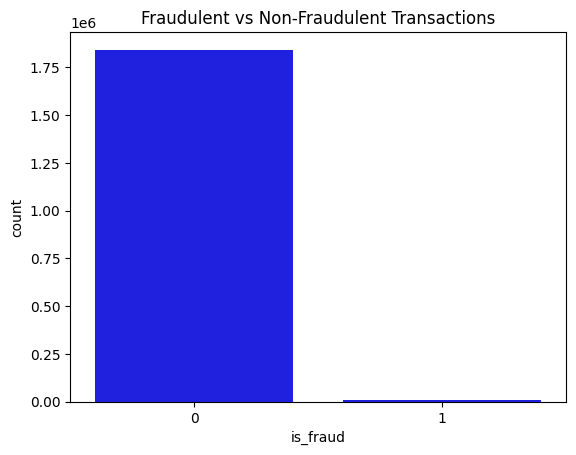

In [51]:
# Histogram of Fraudulent vs Non-Fraudulent Transactions
sns.countplot(data=main_data, x='is_fraud',color='blue')
plot.title('Fraudulent vs Non-Fraudulent Transactions')
plot.show()

In [50]:
main_data = main_data.reset_index(drop=True)

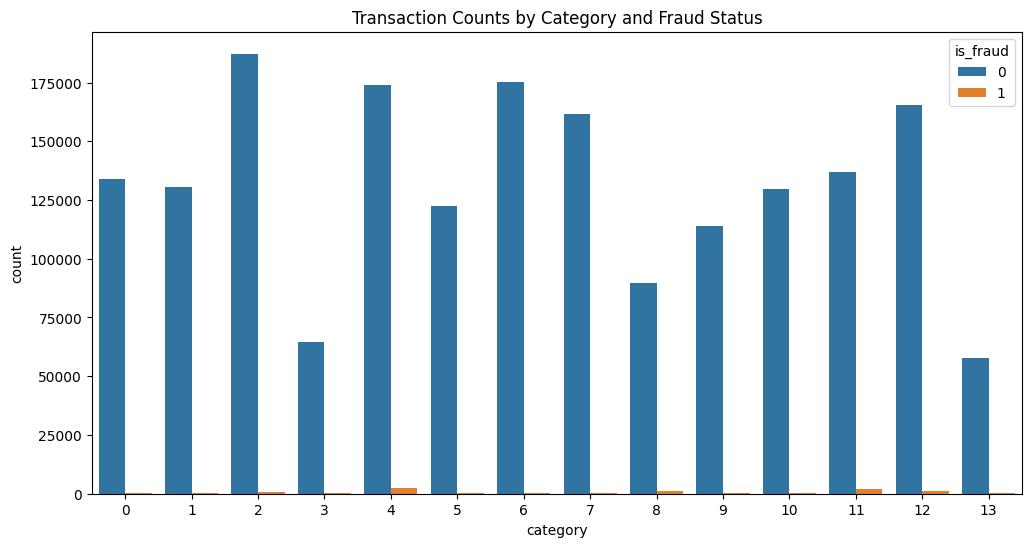

In [54]:
plot.figure(figsize=(12, 6))
sns.countplot(data=main_data, x='category', hue='is_fraud')
plot.title('Transaction Counts by Category and Fraud Status')
plot.yticks(rotation=0)
plot.show()

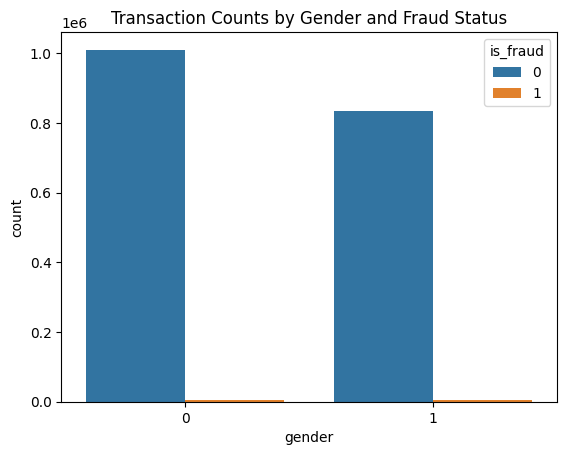

In [56]:
# Transaction count by gender and fraud status
sns.countplot(data=main_data, x='gender', hue='is_fraud')
plot.title('Transaction Counts by Gender and Fraud Status')
plot.show()

In [57]:
X = main_data.drop('is_fraud', axis=1)
y = main_data['is_fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

## LogisticRegression model 

In [61]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

y_pred = log_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

C:\Anaconda\envs\movie_genre_classification\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Anaconda\envs\movie_genre_classification\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\envs\movie_genre_classification\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-sco

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    368602
           1       0.00      0.00      0.00      1877

    accuracy                           0.99    370479
   macro avg       0.50      0.50      0.50    370479
weighted avg       0.99      0.99      0.99    370479

[[368602      0]
 [  1877      0]]
Accuracy: 0.9949335859792323


C:\Anaconda\envs\movie_genre_classification\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## DecisionTreeClassifier

In [62]:
# Training the model with DecisionTreeClassifier
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

y_pred = tree_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    368602
           1       0.79      0.83      0.81      1877

    accuracy                           1.00    370479
   macro avg       0.90      0.91      0.90    370479
weighted avg       1.00      1.00      1.00    370479

[[368195    407]
 [   320   1557]]
Accuracy: 0.9980376755497613


In [63]:
# Training the model with logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

C:\Anaconda\envs\movie_genre_classification\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Anaconda\envs\movie_genre_classification\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\envs\movie_genre_classification\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-sco

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    368602
           1       0.00      0.00      0.00      1877

    accuracy                           0.99    370479
   macro avg       0.50      0.50      0.50    370479
weighted avg       0.99      0.99      0.99    370479

[[368602      0]
 [  1877      0]]
Accuracy: 0.9949335859792323


C:\Anaconda\envs\movie_genre_classification\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Thank You!